# Preprocessing
In this Notebook, we'll do the following.

* Select and merge labels from the full ADE20k dataset that we want to keep
* Select the scenes from the full ADE20k dataset that we want to use for training
* Create new annotation images for each of the selected scenes
* Store this newly created dataset with the same directory structure as PASCAL
* Visualize the scenes and their annotations side-by-side

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import matplotlib.pyplot as plt
from conversion import *

In [5]:
# TODO: Set the directory here for the unprocessed ADE20K full dataset.
SRC_DIR = "../../datasets/ADE20K_2016_07_26/"

# TODO: Set a destination directory for the formatted ADE20K dataset.
DEST_DIR = "../../datasets/bedroom_scenes"

# TODO: Select scenes of interest to keep.
required_keywords = [
    'bedroom', 'childs_room', 'dorm_room', 'hotel_room',  
]

# TODO: Select keywords that cannot be in the sample name. "Outdoor" is
# a common choice here to choose indoor vs outdoor garage scenes, for 
# example.
reject_keywords = ["outdoor"]

want_labels = [
    ('background', ),
    ('door', 'doorframe, doorcase', 'double door'),
    ('bed', 'bedpost', 'blanket, cover', 'headboard',),
    ('wardrobe, closet, press', ),
    ('lamp', ),
    ('chest of drawers, chest, bureau, dresser', 'chest'),
    ('pillow', ),
    ('armchair', 'chair', 'swivel chair'),
    ('pane, pane of glass, window glass', 'windowpane, window',),
    ('curtain, drape, drapery, mantle, pall',),
    ('mirror',),
    ('painting, picture', 'frame',),
    ('wall',),
    ('ceiling',),
    ('floor, flooring',),
]

In [6]:
%%time
convert_to_pascal(SRC_DIR,
                  DEST_DIR,
                  required_keywords=required_keywords,
                  reject_keywords=reject_keywords,
                  want_labels=want_labels)

Partition training has 1679.
Partition validation has 168.
ADE20K dataset has been converted and stored in ../datasets/bedroom_scenes
Label mapping has been stored in ../datasets/bedroom_scenes/new_id_to_label.json
CPU times: user 7min 6s, sys: 3.65 s, total: 7min 9s
Wall time: 7min 10s


## Visualize New Segmentation Masks

In [11]:
# Reads the text file to detect the names of all sample instances in the
# partition of interest.
VOC_DIR = os.path.join(DEST_DIR, "VOCdevkit/VOC2012")
partition = "train"
partition_filepath = os.path.join(VOC_DIR, f"ImageSets/Segmentation/{partition}.txt")
with open(partition_filepath) as rf:
    samples = rf.readlines()
    samples = [sample.strip() for sample in samples]
    
n_samples = len(samples)
img_paths = [os.path.join(VOC_DIR, f'JPEGImages/{s}.jpg') for s in samples]
seg_paths = [os.path.join(VOC_DIR, f'SegmentationClass/{s}.png') for s in samples]

In [12]:
new_id_to_label = get_new_id_to_label(DEST_DIR)

def show_random_sample():
    idx = np.random.randint(n_samples)
    img_fp, seg_fp = img_paths[idx], seg_paths[idx]
    
    plt.figure(dpi=200)
    plt.imshow(imread(img_fp))
    disp_seg(imread(seg_fp), new_id_to_label)

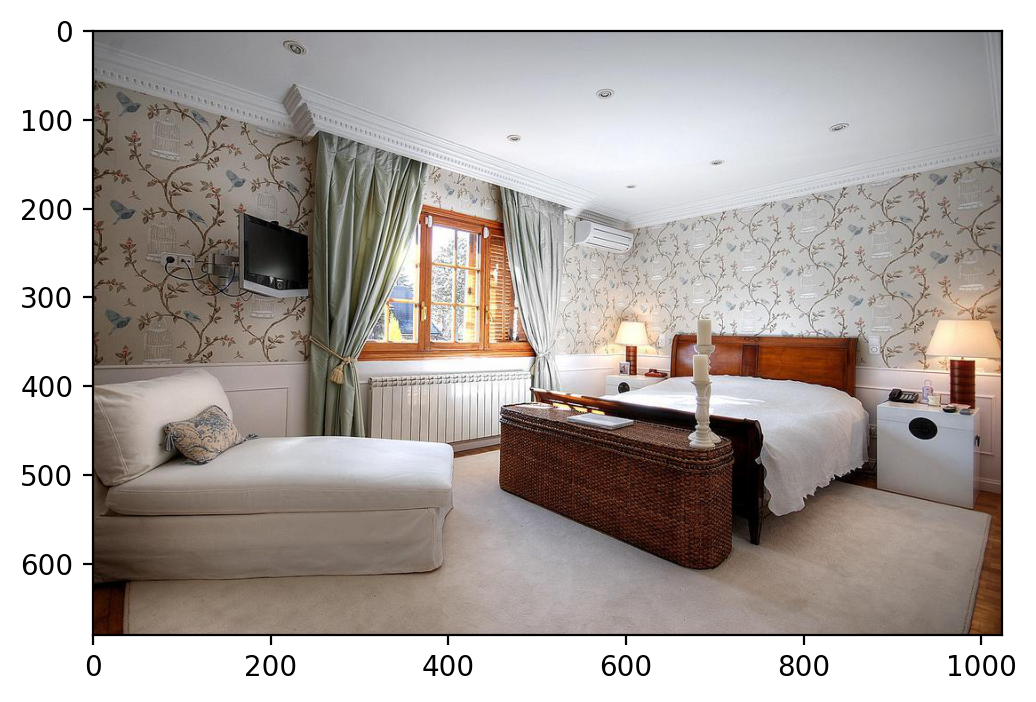

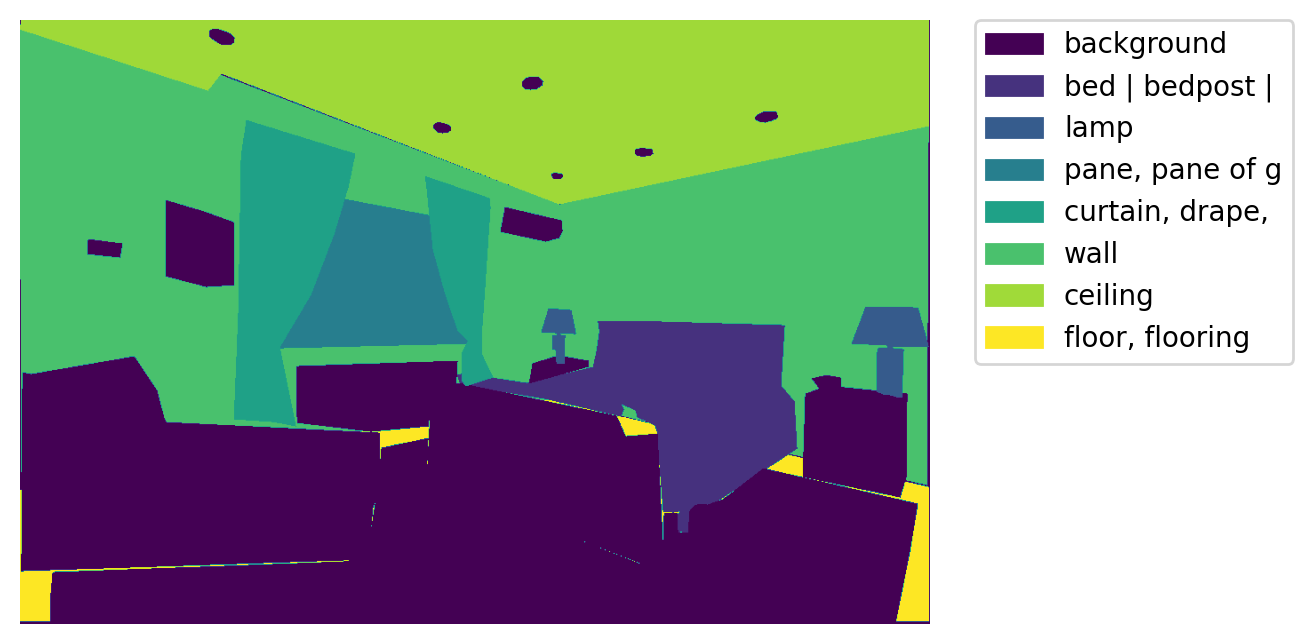

In [13]:
show_random_sample()

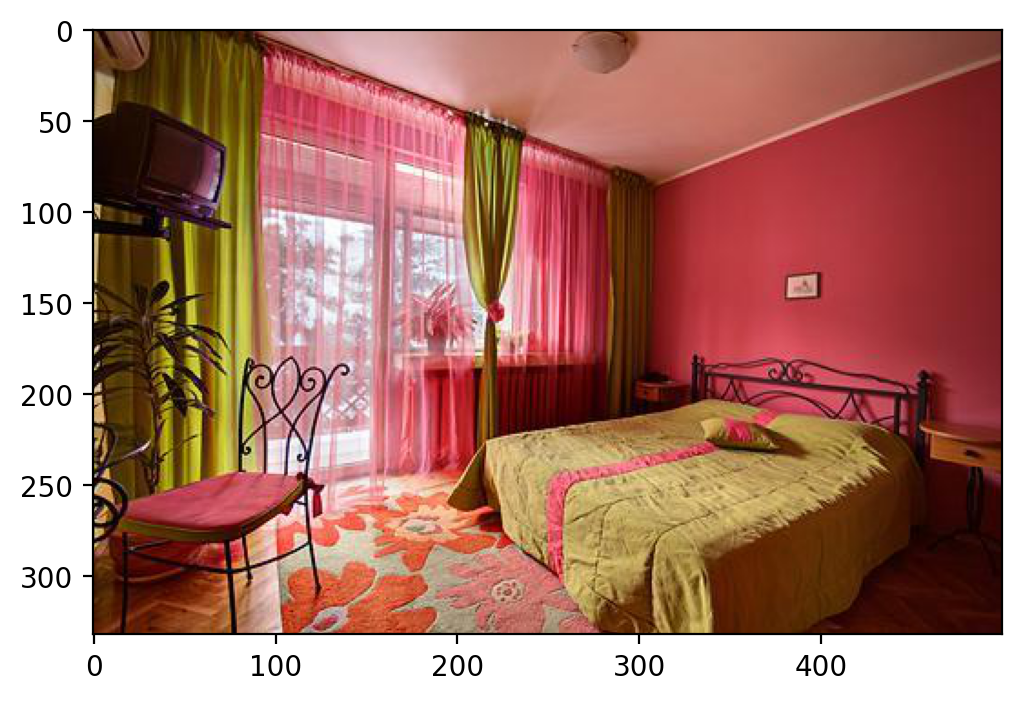

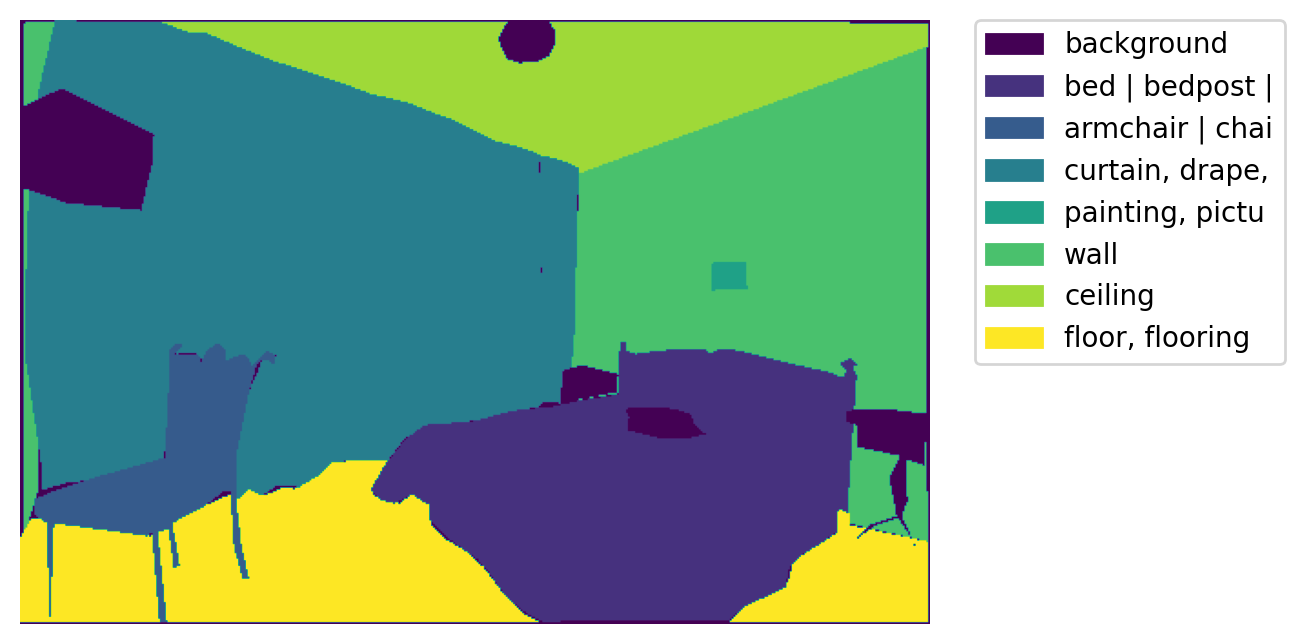

In [14]:
show_random_sample()

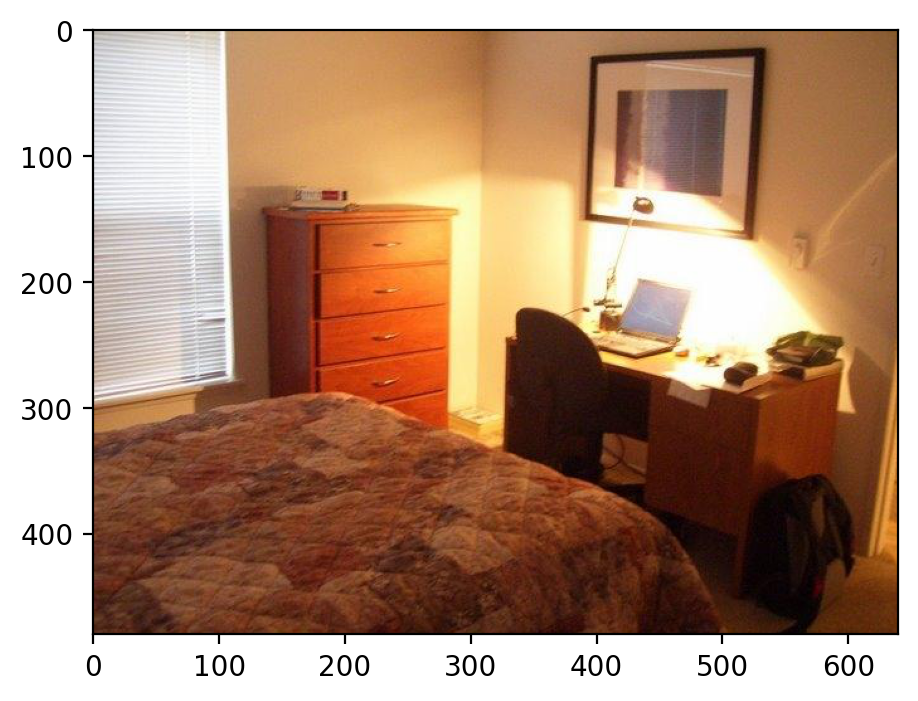

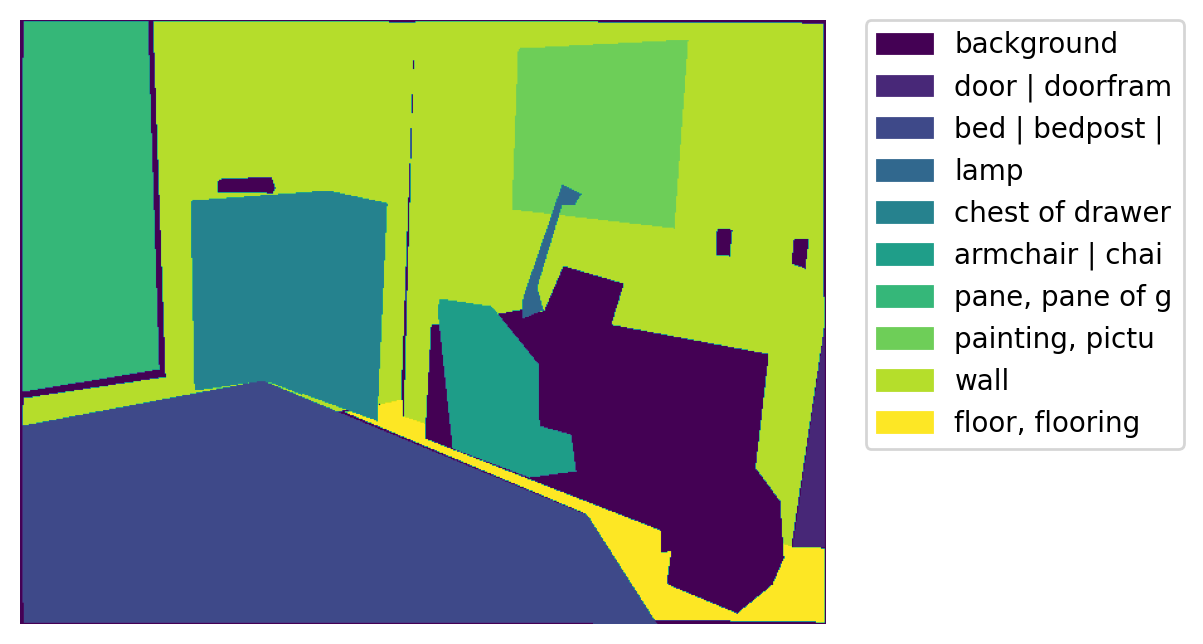

In [15]:
show_random_sample()